In [1]:
import pandas as pd
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
parent_dir = os.path.dirname(os.getcwd())
os.chdir(parent_dir)

In [3]:
from src.data_generation.generate_random_data import *
from src.models.graph import *

In [4]:
# random seed
# np.random.seed(64)
# generate_all_random_data()

In [5]:
part_df_gen = pd.read_excel('data/random_data/part_data.xlsx')
supply_type_df_gen = pd.read_excel('data/random_data/supply_type_data.xlsx')
bom_df_gen = pd.read_excel('data/random_data/bom_data.xlsx')
part_source_df_gen = pd.read_excel('data/random_data/part_source_data.xlsx')
hist_supply_df_gen = pd.read_excel('data/random_data/historical_supply_orders.xlsx')
hist_demand_df_gen = pd.read_excel('data/random_data/historical_demand.xlsx')

### BOM Data

In [4]:
bom_df1_raw = pd.read_excel('data/raw_data/- Bill-of-Materials.xlsx',header=2)
bom_df2_raw = pd.read_excel('data/raw_data/Bill-of-Materials.xlsx',header=2)
bom_df3_raw = pd.read_excel('data/raw_data/Bill-of-Materials (1).xlsx',header=2)
critical_materials_df_raw = pd.read_excel('data/raw_data/- Critical Materials - Material Master Data.xlsx',header=2)
inventory_df_raw = pd.read_excel('data/raw_data/- Inventory by Material-Plant-Stock Category.xlsx', header=2)

Below are the critical components and their info

In [5]:
critical_materials_df_raw

,material_number,material_description,material_type,material_type_description,material_group,material_group_description,product_hierarchy,product_hierarchy_description,created_on,old_material_number,deletion_flag
0,3059897-01,DIAPHRAGM ASSY-ACCESSORY GEARBOX,HALB,Production Material,DIPHRGMY,DIAPHRAGM ASSEMBLY,5739.0,ENGINEERING,2004-04-28,NaN,NaN
1,3121111-01,BLADE-TURBINE,HALB,Production Material,BLADCT,BLADE CMPRSR TURBINE,100001200.0,BLADES grinding,1998-12-05,NaN,NaN
2,3123432-01,BLADE-POWER TURBINE (MACHINING),HALB,Production Material,BLADPT2,BLADE PWRTURB 2STAGE,100001200.0,BLADES grinding,1998-12-05,NaN,NaN
3,3123943-01,"BLADE-TURBINE,POWER",HALB,Production Material,BLADPT,BLADE PWRTURBINE,5739.0,ENGINEERING,2015-04-17,NaN,NaN
4,3135487,BLADE-POWER TURBINE(MACHINING),HALB,Production Material,BLADPT4,BLADE PWRTURB 4STAGE,5739.0,ENGINEERING,2019-01-18,3134564,NaN
5,3138079,SHAFT ASSY-COMPRESSOR ROTOR,HALB,Production Material,SHAFT Y,SHAFT ASSEMBLY,5739.0,ENGINEERING,2024-10-02,NaN,NaN
6,33B6967-02,MANIFOLD-FUEL/OIL,HALB,Production Material,MANIFLD,MANIFOLD,NaN,NaN,2022-06-14,33B6967-01,NaN
7,4506256B,"HOUSING ASSEMBLY, AIR INLET - INSE",HALB,Production Material,HOUSINGY,HOUSING ASSEMBLY,5739.0,ENGINEERING,2015-05-19,NaN,NaN
8,4506295,"NOZZLE ASSY,TURBINE-1ST STAGE COOLED",HALB,Production Material,NOZZLE Y,NOZZLE ASSEMBLY,5739.0,ENGINEERING,2014-11-17,NaN,NaN
9,ST3032-11,"NUT-.3125-24UNJF-3B, OPTION (IC)",HALB,Production Material,NUT Z,NUT (option IC),11000.0,FASTENERS,1998-12-05,NaN,NaN


In [6]:
bom_df_raw = pd.concat([bom_df1_raw,bom_df2_raw,bom_df3_raw])

In [7]:
bom_df_raw.drop_duplicates(inplace=True)
bom_df_raw.reset_index(drop=True,inplace=True)

In [8]:
bom_df_raw[['BOM_extract_type','component','higher_assembly','finished_product','Sum of component_quantity','level','component_description']]

,BOM_extract_type,component,higher_assembly,finished_product,Sum of component_quantity,level,component_description
0,Spares part,3059897-01,3059897-01,3059897-01,1.0,0,DIAPHRAGM ASSY-ACCESSORY GEARBOX
1,PWR,ST3032-11,3078321-01,3078321-01,12.0,1,"NUT-.3125-24UNJF-3B, OPTION (IC)"
2,PWR,ST3032-11,3078322-01,3078322-01,12.0,1,"NUT-.3125-24UNJF-3B, OPTION (IC)"
3,PWR,ST3032-11,3078700-01,3078700-01,8.0,1,"NUT-.3125-24UNJF-3B, OPTION (IC)"
4,Spares part,3121111-01,3121111-01,3121111-01,1.0,0,BLADE-TURBINE
...,...,...,...,...,...,...,...
534,Build Spec,ST2118-11,ST3032-11,BS987,6.0,3,NUT
535,Build Spec,ST2119-11,ST3032-11,BS987,6.0,3,NUT
536,Build Spec,3138077,3138079,BS987,1.0,3,"SHAFT-STUB,COMPRESSOR ROTOR"
537,Build Spec,3018175,3138079,BS987,1.0,3,COUPLING-COMPRESSOR REAR HUB


In [12]:
bom_df_raw[['BOM_extract_type','component','higher_assembly','finished_product','Sum of component_quantity','level','component_description']][bom_df_raw['finished_product'].isin(['3059897-01', '3078321-01', '3078322-01', '3078700-01',
       '3121111-01', '3123432-01', '3123943-01', '3135487', '3136590',
       '3138079', '4506256B'])].sort_values(by=['finished_product','level'])

,BOM_extract_type,component,higher_assembly,finished_product,Sum of component_quantity,level,component_description
0,Spares part,3059897-01,3059897-01,3059897-01,1.000,0,DIAPHRAGM ASSY-ACCESSORY GEARBOX
154,Spares part,3059894-01,3059897-01,3059897-01,1.000,1,DIAPHRAGM-ACCESSORY GEARBOX(MACH)
156,Spares part,3006523,3059897-01,3059897-01,1.000,1,BEARING-SLEEVE
158,Spares part,3003987,3059897-01,3059897-01,1.000,1,PIN-LOCK .0938DIAX.390LONG
159,Spares part,NAS1130-3L20,3059897-01,3059897-01,22.000,1,"INSERT-SCR,THD.190-32X.38,SLKG,TNGLS"
160,Spares part,NAS1130-3L25,3059897-01,3059897-01,6.000,1,INSERT
161,Spares part,ST3287-01,3059897-01,3059897-01,3.000,1,INSERT-FLANGE JACKING
155,Spares part,93059893,3059894-01,3059897-01,1.000,2,CSTG-DIAPHRAGM-ACCESSORY GEARBOX
157,Spares part,12111785,3006523,3059897-01,0.148,2,"BAR CPW615 DIA 1,875"""
162,Spares part,16980500,ST3287-01,3059897-01,0.174,2,"BARS-0.500"" DIA."


In [10]:
bom_df_raw['finished_product'].unique()

array(['3059897-01', '3078321-01', '3078322-01', '3078700-01',
       '3121111-01', '3123432-01', '3123943-01', '3135487', '3136590',
       '3138079', '4506256B', 'BS1018', 'BS1024', 'BS1028', 'BS1035',
       'BS1068', 'BS1102', 'BS1127', 'BS1132', 'BS1212', 'BS1215',
       'BS1226', 'BS1228', 'BS1236', 'BS1237', 'BS1247', 'BS1283',
       'BS1290', 'BS1294', 'BS1304', 'BS1306', 'BS1309', 'BS1313',
       'BS1319', 'BS1320', 'BS1341', 'BS1345', 'BS1360', 'BS1361',
       'BS1366', 'BS1369', 'BS1371', 'BS1373', 'BS1375', 'BS1388',
       'BS1394', 'BS1395', 'BS1396', 'BS1400', 'BS1401', 'BS1409',
       'BS1412', 'BS1433', 'BS1435', 'BS1436', 'BS1445', 'BS1451',
       'BS1465', 'BS1486', 'BS1499', 'BS661', 'BS723', 'BS847', 'BS869',
       'BS885', 'BS945', 'BS960', 'BS987'], dtype=object)

### Buy Data

In [9]:
make_parts_raw = pd.read_excel('data/raw_data/- Make parts - 2018-2026 POs.xlsx', header=2)
buy_parts_raw = pd.read_excel('data/raw_data/- Buy parts - 2018-2026 Supply orders.xlsx', header=2)
demand_data_raw = pd.read_excel('data/raw_data/- historical_demand_v2025_03_27.xlsx')

In [10]:
demand_data_raw

,mrpc_snapshot_date,plant,material_number,planning_period,sum(receipt_requirement_quantity)
0,2018-01-02,32,BS1236,2018-01-01,2.0
1,2018-01-02,32,BS1361,2018-01-01,3.0
2,2018-01-02,32,BS1228,2018-01-01,4.0
3,2018-01-02,32,3121111-01,2018-01-01,590.0
4,2018-01-02,61,BS1371,2018-01-01,2.0
...,...,...,...,...,...
6027,2025-01-01,Z010,3138079,2026-12-01,12.0
6028,2025-01-01,1,3135487,2026-12-01,1349.0
6029,2025-01-01,1,3138079,2026-12-01,2.0
6030,2025-01-01,61,BS1388,2026-12-01,1.0


In [11]:
make_parts_raw['material_number'].unique()

array(['3123432-01', '3135487', '3121111-01', '3123943-01', '3138079',
       '4506256B'], dtype=object)

In [12]:
buy_parts_raw['material_number'].unique()

array(['3123432-01', '3123943-01', '4506256B', '3059897-01', '3138079',
       '3121111-01', '3135487', '4506295', 'ST3032-11', '33B6967-02'],
      dtype=object)

In [15]:
bom_df_raw[['BOM_extract_type','component','higher_assembly','finished_product','Sum of component_quantity','level','component_description']][bom_df_raw['finished_product'] == '3123432-01'].sort_values(by=['finished_product','level'])

,BOM_extract_type,component,higher_assembly,finished_product,Sum of component_quantity,level,component_description
5,Spares part,3123432-01,3123432-01,3123432-01,1.0,0,BLADE-POWER TURBINE (MACHINING)
165,Spares part,SF3123422-01,3123432-01,3123432-01,1.0,1,01FF06TURBINE
166,Spares part,93038602,SF3123422-01,3123432-01,1.0,2,CSTG-CASTING


In [13]:
make_parts_raw[make_parts_raw['material_number'] == '3123432-01']

,material_number,material_description,material_category_1,model_group,program,plant,order_number,production_order_status,order_type,Mvt,...,MRP Cntrl,MRP Controller Name,Prod Sup,Production Scheduler Description,organisation_level_1,organisation_level_2,organisation_level_3,organisation_level_4,organisation_level_5,Snapshot
0,3123432-01,BLADE-POWER TURBINE (MACHINING),Production Material,PT6A HP,PT6A,0001,3281188456,Planned order,LA,NaN,...,UE1,FERGUSON W.16A,16A,WILLIAM FERGUSON,Operations,Manufacturing,Canadian Manufacturing Operations,Campus 1 LEGACY,C1-Site 2,2025-03-23
6,3123432-01,BLADE-POWER TURBINE (MACHINING),Production Material,PT6A HP,PT6A,0001,3281188455,Planned order,LA,NaN,...,UE1,FERGUSON W.16A,16A,WILLIAM FERGUSON,Operations,Manufacturing,Canadian Manufacturing Operations,Campus 1 LEGACY,C1-Site 2,2025-03-23
10,3123432-01,BLADE-POWER TURBINE (MACHINING),Production Material,PT6A HP,PT6A,0001,3281188454,Planned order,LA,NaN,...,UE1,FERGUSON W.16A,16A,WILLIAM FERGUSON,Operations,Manufacturing,Canadian Manufacturing Operations,Campus 1 LEGACY,C1-Site 2,2025-03-23
15,3123432-01,BLADE-POWER TURBINE (MACHINING),Production Material,PT6A HP,PT6A,0001,3281188453,Planned order,LA,NaN,...,UE1,FERGUSON W.16A,16A,WILLIAM FERGUSON,Operations,Manufacturing,Canadian Manufacturing Operations,Campus 1 LEGACY,C1-Site 2,2025-03-23
19,3123432-01,BLADE-POWER TURBINE (MACHINING),Production Material,PT6A HP,PT6A,0001,3281188452,Planned order,LA,NaN,...,UE1,FERGUSON W.16A,16A,WILLIAM FERGUSON,Operations,Manufacturing,Canadian Manufacturing Operations,Campus 1 LEGACY,C1-Site 2,2025-03-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6305,3123432-01,BLADE-POWER TURBINE (MACHINING),Production Material,PT6A HP,PT6A,0001,1001175280,Goods Receipt,PP01,101.0,...,UE1,FERGUSON W.16A,NaN,NaN,Operations,Manufacturing,Canadian Manufacturing Operations,Campus 1 LEGACY,C1-Site 2,2025-03-23
6306,3123432-01,BLADE-POWER TURBINE (MACHINING),Production Material,PT6A HP,PT6A,0001,1001176168,Goods Receipt,PP01,101.0,...,UE1,FERGUSON W.16A,NaN,NaN,Operations,Manufacturing,Canadian Manufacturing Operations,Campus 1 LEGACY,C1-Site 2,2025-03-23
6307,3123432-01,BLADE-POWER TURBINE (MACHINING),Production Material,PT6A HP,PT6A,0001,1001214653,Goods Receipt,PP01,101.0,...,UE1,FERGUSON W.16A,NaN,NaN,Operations,Manufacturing,Canadian Manufacturing Operations,Campus 1 LEGACY,C1-Site 2,2025-03-23
6334,3123432-01,BLADE-POWER TURBINE (MACHINING),Production Material,PT6A HP,PT6A,0001,1001211217,Goods Receipt,PP01,101.0,...,UE1,FERGUSON W.16A,NaN,NaN,Operations,Manufacturing,Canadian Manufacturing Operations,Campus 1 LEGACY,C1-Site 2,2025-03-23


In [16]:
buy_parts_raw[buy_parts_raw['material_number'] == '3123432-01']

,company,vendor_number,vendor_name,cntry,plant,material_number,material_description,material_category_1,storage_loc,model_group,...,list_engine_model,list_engine_model_group,list_engine_program,organization_level_1,organization_level_2,organization_level_3,organization_level_4,organization_level_5,organization_level_6,snapshot_date
0,1000,0000702055,WALBAR LLC,US,1,3123432-01,BLADE-POWER TURBINE (MACHINING),Production Material,12F,PT6A HP,...,PT6A-52 (0.45); PT6A-65AG (0.19); PT6A-60A (0....,PT6A HP (1.00),PT6A (1.00),Operations,Manufacturing,Canadian Manufacturing Operations,Campus 1 LEGACY,C1-Site 2,NaN,2025-03-23
1,1000,0000702055,WALBAR LLC,US,1,3123432-01,BLADE-POWER TURBINE (MACHINING),Production Material,1D,PT6A HP,...,PT6A-52 (0.45); PT6A-65AG (0.19); PT6A-60A (0....,PT6A HP (1.00),PT6A (1.00),Operations,Manufacturing,Canadian Manufacturing Operations,Campus 1 LEGACY,C1-Site 2,NaN,2025-03-23
2,1000,0000702055,WALBAR LLC,US,1,3123432-01,BLADE-POWER TURBINE (MACHINING),Production Material,1D,PT6A HP,...,PT6A-52 (0.45); PT6A-65AG (0.19); PT6A-60A (0....,PT6A HP (1.00),PT6A (1.00),Operations,Manufacturing,Canadian Manufacturing Operations,Campus 1 LEGACY,C1-Site 2,NaN,2025-03-23
3,1000,0000702055,WALBAR LLC,US,1,3123432-01,BLADE-POWER TURBINE (MACHINING),Production Material,1D,PT6A HP,...,PT6A-52 (0.45); PT6A-65AG (0.19); PT6A-60A (0....,PT6A HP (1.00),PT6A (1.00),Operations,Manufacturing,Canadian Manufacturing Operations,Campus 1 LEGACY,C1-Site 2,NaN,2025-03-23
4,1000,0000702055,WALBAR LLC,US,1,3123432-01,BLADE-POWER TURBINE (MACHINING),Production Material,1D,PT6A HP,...,PT6A-52 (0.45); PT6A-65AG (0.19); PT6A-60A (0....,PT6A HP (1.00),PT6A (1.00),Operations,Manufacturing,Canadian Manufacturing Operations,Campus 1 LEGACY,C1-Site 2,NaN,2025-03-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5487,1000,#,NaN,NaN,17,3123432-01,BLADE-POWER TURBINE (MACHINING),Production Material,17B,PT6A HP,...,PT6A-52 (0.45); PT6A-65AG (0.19); PT6A-60A (0....,PT6A HP (1.00),PT6A (1.00),Customer Service,Commercial Services,P&WC Spare Parts,Non-SM Suppliers,Non-SM Suppliers,Non-SM Suppliers,2025-03-23
5488,1000,#,NaN,NaN,17,3123432-01,BLADE-POWER TURBINE (MACHINING),Production Material,17B,PT6A HP,...,PT6A-52 (0.45); PT6A-65AG (0.19); PT6A-60A (0....,PT6A HP (1.00),PT6A (1.00),Customer Service,Commercial Services,P&WC Spare Parts,Non-SM Suppliers,Non-SM Suppliers,Non-SM Suppliers,2025-03-23
5489,1000,#,NaN,NaN,17,3123432-01,BLADE-POWER TURBINE (MACHINING),Production Material,17B,PT6A HP,...,PT6A-52 (0.45); PT6A-65AG (0.19); PT6A-60A (0....,PT6A HP (1.00),PT6A (1.00),Customer Service,Commercial Services,P&WC Spare Parts,Non-SM Suppliers,Non-SM Suppliers,Non-SM Suppliers,2025-03-23
5490,1000,#,NaN,NaN,32,3123432-01,BLADE-POWER TURBINE (MACHINING),Production Material,32F,PT6A HP,...,PT6A-52 (0.45); PT6A-65AG (0.19); PT6A-60A (0....,PT6A HP (1.00),PT6A (1.00),Operations,Manufacturing,Canadian Manufacturing Operations,Campus 1 LEGACY,C1-Site 2,NaN,2025-03-23


In [71]:
inventory_df_raw

,material_number,material_description,material_group,material_category_1,material_category_2,model_group,program,plant,proc_type,SPT,...,main_source_name,vendor_country_key,list_of_valid_sources,organization_level_1,organization_level_2,organization_level_3,organization_level_4,organization_level_5,organization_level_6,snapshot_date
0,ST3032-11,"NUT-.3125-24UNJF-3B, OPTION (IC)",NUT Z,Production Material,Finished Parts,PW200,PW200,0017,F,NaN,...,HOWMET GLOBAL FASTENING SYSTEMS INC,US,721236,Customer Service,Commercial Services,P&WC Spare Parts,NaN,NaN,NaN,2025-03-16
1,ST3032-11,"NUT-.3125-24UNJF-3B, OPTION (IC)",NUT Z,Production Material,Finished Parts,PW150,PW150,0001,F,NaN,...,HOWMET GLOBAL FASTENING SYSTEMS INC,US,721236,Operations,Procurement,Supply Management,"BU3 Externals, Controls & Dist. Hard.","Externals, Controls & Dist. Hard.",Distributed Hardware & Tubes,2025-03-16
2,3123432-01,BLADE-POWER TURBINE (MACHINING),BLADPT2,Production Material,Finished Parts,PT6A HP,PT6A,0017,F,40.0,...,Campus 1,NaN,Campus 1 (100),Customer Service,Commercial Services,P&WC Spare Parts,NaN,NaN,NaN,2025-03-16
3,3059897-01,DIAPHRAGM ASSY-ACCESSORY GEARBOX,DIPHRGMY,Production Material,Finished Parts,PT6A HP,PT6A,0032,F,30.0,...,VITAL ENGINEERED COMPONENTS COMPANY,US,15546,Operations,Procurement,Supply Management,BU2 Airfoils & Castings,Machined Castings,Machined from Casting,2025-03-16
4,3138079,SHAFT ASSY-COMPRESSOR ROTOR,SHAFT Y,Production Material,Finished Parts,PT6T,PT6T,0001,F,NaN,...,Pratt & Whitney Kalisz,PL,16948,Operations,Manufacturing,Global Manufacturing & Transitions,GM&T - Eastern Europe/Poland,NaN,NaN,2025-03-16
5,4506256B,"HOUSING ASSEMBLY, AIR INLET - INSE",HOUSINGY,Production Material,Finished Parts,APS2000,APS,0061,F,NaN,...,VITAL ENGINEERED COMPONENTS COMPANY,US,15546,Operations,Manufacturing,PWAeroPower - Procurement,BU2 Airfoils & Castings,Machined Castings,Machined from Casting,2025-03-16
6,3059897-01,DIAPHRAGM ASSY-ACCESSORY GEARBOX,DIPHRGMY,Production Material,Finished Parts,PT6A HP,PT6A,0001,F,30.0,...,VITAL ENGINEERED COMPONENTS COMPANY,US,15546,Operations,Procurement,Supply Management,BU2 Airfoils & Castings,Machined Castings,Machined from Casting,2025-03-16
7,3121111-01,BLADE-TURBINE,BLADCT,Production Material,Finished Parts,PT6A HP,PT6A,0001,F,41.0,...,Campus 41,NaN,Campus 41 (100),Operations,Manufacturing,Canadian Manufacturing Operations,Campus 41,C41-Blades,NaN,2025-03-16
8,3123432-01,BLADE-POWER TURBINE (MACHINING),BLADPT2,Production Material,Finished Parts,PT6A HP,PT6A,0001,E,NaN,...,Campus 1,NaN,Campus 1 (100),Operations,Manufacturing,Canadian Manufacturing Operations,Campus 1 LEGACY,C1-Site 2,NaN,2025-03-16
9,3123943-01,"BLADE-TURBINE,POWER",BLADPT,Production Material,Finished Parts,PW100,PW100,0001,F,41.0,...,Campus 41,NaN,Campus 41 (100),Operations,Manufacturing,Canadian Manufacturing Operations,Campus 41,C41-Blades,NaN,2025-03-16


In [66]:
# find unique procurement_type for each finished_product
test[test['BOM_extract_type']=='Build Spec'].groupby('component')['procurement_type'].unique().reset_index()

,component,procurement_type
0,3059897-01,[F]
1,3121111-01,[E]
2,3123432-01,[E]
3,3123943-01,[E]
4,3135487,[E]
5,3138079,[F]
6,33B6967-02,[F]
7,4506256B,[F]
8,4506295,[F]
9,ST3032-11,[F]


In [64]:
test[test['component'].isin(make_parts_raw['material_number'].unique())]

,BOM_extract_type,finished_product,component,Sum of component_quantity,higher_assembly,procurement_type,component_description
4,Spares part,3121111-01,3121111-01,1,3121111-01,NaN,BLADE-TURBINE
5,Spares part,3123432-01,3123432-01,1,3123432-01,NaN,BLADE-POWER TURBINE (MACHINING)
6,Spares part,3123943-01,3123943-01,1,3123943-01,NaN,"BLADE-TURBINE,POWER"
7,Spares part,3135487,3135487,1,3135487,NaN,BLADE-POWER TURBINE(MACHINING)
9,PWK,3138079,3138079,1,3138079,E,SHAFT ASSY-COMPRESSOR ROTOR
...,...,...,...,...,...,...,...
148,Build Spec,BS960,3123432-01,47,AFS02002012,E,BLADE-POWER TURBINE (MACHINING)
149,Build Spec,BS960,3121111-01,59,AFS02001012,E,BLADE-TURBINE
150,Build Spec,BS960,3123432-01,47,AFS02002012,E,BLADE-POWER TURBINE (MACHINING)
151,Build Spec,BS960,3121111-01,59,AFS02001012,E,BLADE-TURBINE


In [55]:
buy_parts_raw['material_number'].unique()

array(['3123432-01', '3123943-01', '4506256B', '3059897-01', '3138079',
       '3121111-01', '3135487', '4506295', 'ST3032-11', '33B6967-02'],
      dtype=object)

In [56]:
# find common values between to arrays
np.intersect1d(make_parts_raw['material_number'].unique(), buy_parts_raw['material_number'].unique())

array(['3121111-01', '3123432-01', '3123943-01', '3135487', '3138079',
       '4506256B'], dtype=object)

In [58]:
test[test['BOM_extract_type']=='Build Spec']['component'].unique()

array(['3123943-01', '3135487', '3123432-01', '3121111-01', 'ST3032-11',
       '3059897-01', '33B6967-02', '3138079', '4506256B', '4506295'],
      dtype=object)

In [60]:
# find unique values between arrays
np.setdiff1d(buy_parts_raw['material_number'].unique(), make_parts_raw['material_number'].unique())

array(['3059897-01', '33B6967-02', '4506295', 'ST3032-11'], dtype=object)

In [51]:
make_parts_raw

,material_number,material_description,material_category_1,model_group,program,plant,order_number,production_order_status,order_type,Mvt,...,MRP Cntrl,MRP Controller Name,Prod Sup,Production Scheduler Description,organisation_level_1,organisation_level_2,organisation_level_3,organisation_level_4,organisation_level_5,Snapshot
0,3123432-01,BLADE-POWER TURBINE (MACHINING),Production Material,PT6A HP,PT6A,0001,3281188456,Planned order,LA,NaN,...,UE1,FERGUSON W.16A,16A,WILLIAM FERGUSON,Operations,Manufacturing,Canadian Manufacturing Operations,Campus 1 LEGACY,C1-Site 2,2025-03-23
1,3135487,BLADE-POWER TURBINE(MACHINING),Production Material,PW100,PW100,0041,3281219802,Planned order,LA,NaN,...,IF1,MICHAEL MACDONALD,52D,JAMES WHEATLEY,Operations,Manufacturing,Canadian Manufacturing Operations,Campus 41,C41-Blades,2025-03-23
2,3121111-01,BLADE-TURBINE,Production Material,PT6A HP,PT6A,0041,3281225719,Planned order,LA,NaN,...,IF1,MICHAEL MACDONALD,52D,JAMES WHEATLEY,Operations,Manufacturing,Canadian Manufacturing Operations,Campus 41,C41-Blades,2025-03-23
3,3123943-01,"BLADE-TURBINE,POWER",Production Material,PW100,PW100,0041,3281252882,Planned order,LA,NaN,...,IF1,MICHAEL MACDONALD,52D,JAMES WHEATLEY,Operations,Manufacturing,Canadian Manufacturing Operations,Campus 41,C41-Blades,2025-03-23
4,3123943-01,"BLADE-TURBINE,POWER",Production Material,PW100,PW100,0041,3281252881,Planned order,LA,NaN,...,IF1,MICHAEL MACDONALD,52D,JAMES WHEATLEY,Operations,Manufacturing,Canadian Manufacturing Operations,Campus 41,C41-Blades,2025-03-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6372,3121111-01,BLADE-TURBINE,Production Material,PT6A HP,PT6A,0041,1001201856,Goods Receipt,PP01,101.0,...,IF1,MICHAEL MACDONALD,NaN,NaN,Operations,Manufacturing,Canadian Manufacturing Operations,Campus 41,C41-Blades,2025-03-23
6373,3121111-01,BLADE-TURBINE,Production Material,PT6A HP,PT6A,0041,1001201230,Goods Receipt,PP01,101.0,...,IF1,MICHAEL MACDONALD,NaN,NaN,Operations,Manufacturing,Canadian Manufacturing Operations,Campus 41,C41-Blades,2025-03-23
6374,3121111-01,BLADE-TURBINE,Production Material,PT6A HP,PT6A,0041,1001201232,Goods Receipt,PP01,101.0,...,IF1,MICHAEL MACDONALD,NaN,NaN,Operations,Manufacturing,Canadian Manufacturing Operations,Campus 41,C41-Blades,2025-03-23
6375,3121111-01,BLADE-TURBINE,Production Material,PT6A HP,PT6A,0041,1001201233,Goods Receipt,PP01,101.0,...,IF1,MICHAEL MACDONALD,NaN,NaN,Operations,Manufacturing,Canadian Manufacturing Operations,Campus 41,C41-Blades,2025-03-23


In [53]:
buy_parts_raw

,company,vendor_number,vendor_name,cntry,plant,material_number,material_description,material_category_1,storage_loc,model_group,...,list_engine_model,list_engine_model_group,list_engine_program,organization_level_1,organization_level_2,organization_level_3,organization_level_4,organization_level_5,organization_level_6,snapshot_date
0,1000,0000702055,WALBAR LLC,US,1,3123432-01,BLADE-POWER TURBINE (MACHINING),Production Material,12F,PT6A HP,...,PT6A-52 (0.45); PT6A-65AG (0.19); PT6A-60A (0....,PT6A HP (1.00),PT6A (1.00),Operations,Manufacturing,Canadian Manufacturing Operations,Campus 1 LEGACY,C1-Site 2,NaN,2025-03-23
1,1000,0000702055,WALBAR LLC,US,1,3123432-01,BLADE-POWER TURBINE (MACHINING),Production Material,1D,PT6A HP,...,PT6A-52 (0.45); PT6A-65AG (0.19); PT6A-60A (0....,PT6A HP (1.00),PT6A (1.00),Operations,Manufacturing,Canadian Manufacturing Operations,Campus 1 LEGACY,C1-Site 2,NaN,2025-03-23
2,1000,0000702055,WALBAR LLC,US,1,3123432-01,BLADE-POWER TURBINE (MACHINING),Production Material,1D,PT6A HP,...,PT6A-52 (0.45); PT6A-65AG (0.19); PT6A-60A (0....,PT6A HP (1.00),PT6A (1.00),Operations,Manufacturing,Canadian Manufacturing Operations,Campus 1 LEGACY,C1-Site 2,NaN,2025-03-23
3,1000,0000702055,WALBAR LLC,US,1,3123432-01,BLADE-POWER TURBINE (MACHINING),Production Material,1D,PT6A HP,...,PT6A-52 (0.45); PT6A-65AG (0.19); PT6A-60A (0....,PT6A HP (1.00),PT6A (1.00),Operations,Manufacturing,Canadian Manufacturing Operations,Campus 1 LEGACY,C1-Site 2,NaN,2025-03-23
4,1000,0000702055,WALBAR LLC,US,1,3123432-01,BLADE-POWER TURBINE (MACHINING),Production Material,1D,PT6A HP,...,PT6A-52 (0.45); PT6A-65AG (0.19); PT6A-60A (0....,PT6A HP (1.00),PT6A (1.00),Operations,Manufacturing,Canadian Manufacturing Operations,Campus 1 LEGACY,C1-Site 2,NaN,2025-03-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7245,1000,#,NaN,NaN,22,ST3032-11,"NUT-.3125-24UNJF-3B, OPTION (IC)",Production Material,NaN,PT6A LP,...,PT6A-140 (0.19); PW815GA (0.09); PT6A-140AG (0...,PT6A LP (0.32); PT6A HP (0.18); PW800 (0.17); ...,PT6A (0.50); PW800 (0.17); PT6T (0.13); PW200 ...,Operations,Manufacturing,Canadian Engine Centers,Mississauga,Mississauga-Kanban,NaN,2025-03-23
7246,1000,#,NaN,NaN,22,ST3032-11,"NUT-.3125-24UNJF-3B, OPTION (IC)",Production Material,NaN,PT6A LP,...,PT6A-140 (0.19); PW815GA (0.09); PT6A-140AG (0...,PT6A LP (0.32); PT6A HP (0.18); PW800 (0.17); ...,PT6A (0.50); PW800 (0.17); PT6T (0.13); PW200 ...,Operations,Manufacturing,Canadian Engine Centers,Mississauga,Mississauga-Kanban,NaN,2025-03-23
7247,1000,#,NaN,NaN,101,ST3032-11,"NUT-.3125-24UNJF-3B, OPTION (IC)",Production Material,NaN,PT6A LP,...,PT6A-140 (0.19); PW815GA (0.09); PT6A-140AG (0...,PT6A LP (0.32); PT6A HP (0.18); PW800 (0.17); ...,PT6A (0.50); PW800 (0.17); PT6T (0.13); PW200 ...,Operations,Manufacturing,Canadian Engine Centers,Longueuil,Longueuil-Kanban,NaN,2025-03-23
7248,1000,#,NaN,NaN,101,ST3032-11,"NUT-.3125-24UNJF-3B, OPTION (IC)",Production Material,NaN,PT6A LP,...,PT6A-140 (0.19); PW815GA (0.09); PT6A-140AG (0...,PT6A LP (0.32); PT6A HP (0.18); PW800 (0.17); ...,PT6A (0.50); PW800 (0.17); PT6T (0.13); PW200 ...,Operations,Manufacturing,Canadian Engine Centers,Longueuil,Longueuil-Kanban,NaN,2025-03-23


In [52]:
bom_df_raw[['BOM_extract_type', 'finished_product', 'plant', 'sequence',
            'level','component', 'component_description', 'component_plant',
            'Sum of component_quantity', 'unit','higher_assembly','change_number']].sort_values('finished_product')

,BOM_extract_type,finished_product,plant,sequence,level,component,component_description,component_plant,Sum of component_quantity,unit,higher_assembly,change_number
0,Spares part,3059897-01,0001,0,0,3059897-01,DIAPHRAGM ASSY-ACCESSORY GEARBOX,0001,1,EA,3059897-01,NaN
1,PWR,3078321-01,Z200,270,1,ST3032-11,"NUT-.3125-24UNJF-3B, OPTION (IC)",Z290,12,EA,3078321-01,500000049154
2,PWR,3078322-01,Z200,296,1,ST3032-11,"NUT-.3125-24UNJF-3B, OPTION (IC)",Z290,12,EA,3078322-01,500000049154
3,PWR,3078700-01,Z200,253,1,ST3032-11,"NUT-.3125-24UNJF-3B, OPTION (IC)",Z290,8,EA,3078700-01,500000049154
4,Spares part,3121111-01,0041,0,0,3121111-01,BLADE-TURBINE,0041,1,EA,3121111-01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
148,Build Spec,BS960,0032,33,2,3123432-01,BLADE-POWER TURBINE (MACHINING),0001,47,EA,AFS02002012,NaN
149,Build Spec,BS960,0032,1074,2,3121111-01,BLADE-TURBINE,0041,59,EA,AFS02001012,NaN
151,Build Spec,BS960,0101,1053,2,3121111-01,BLADE-TURBINE,0041,59,EA,AFS02001012,NaN
152,Build Spec,BS987,0101,84,2,ST3032-11,"NUT-.3125-24UNJF-3B, OPTION (IC)",0001,6,EA,AFS03014012,NaN


In [44]:
bom_df_raw[['BOM_extract_type', 'finished_product','component','Sum of component_quantity',
            'higher_assembly','procurement_type','component_description']].to_excel('test.xlsx',index=False,header=True)

In [42]:
print(bom_df_raw['BOM_extract_type'].value_counts())

BOM_extract_type
Build Spec     143
Spares part      5
PWR              5
PWK              1
Name: count, dtype: int64


In [27]:
bom_df_raw[bom_df_raw['BOM_extract_type']=='Build Spec'][['component', 'finished_product', 'higher_assembly']].to_excel('test.xlsx',index=False,header=True)

In [45]:
test = pd.read_excel('test.xlsx')

In [46]:
test[~test['procurement_type'].isna()].sort_values(by=['component','higher_assembly'])

,BOM_extract_type,finished_product,component,Sum of component_quantity,higher_assembly,procurement_type,component_description
35,Build Spec,BS1226,3059897-01,1,AFS02029032,F,DIAPHRAGM ASSY-ACCESSORY GEARBOX
36,Build Spec,BS1226,3059897-01,1,AFS02029032,F,DIAPHRAGM ASSY-ACCESSORY GEARBOX
88,Build Spec,BS1361,3059897-01,1,AFS02029032,F,DIAPHRAGM ASSY-ACCESSORY GEARBOX
89,Build Spec,BS1361,3059897-01,1,AFS02029032,F,DIAPHRAGM ASSY-ACCESSORY GEARBOX
108,Build Spec,BS1400,3059897-01,1,AFS02029032,F,DIAPHRAGM ASSY-ACCESSORY GEARBOX
...,...,...,...,...,...,...,...
85,Build Spec,BS1360,ST3032-11,8,AFS16060002,F,"NUT-.3125-24UNJF-3B, OPTION (IC)"
90,Build Spec,BS1366,ST3032-11,1,AFS16060005,F,"NUT-.3125-24UNJF-3B, OPTION (IC)"
91,Build Spec,BS1366,ST3032-11,1,AFS16060005,F,"NUT-.3125-24UNJF-3B, OPTION (IC)"
52,Build Spec,BS1290,ST3032-11,1,AFS16122001,F,"NUT-.3125-24UNJF-3B, OPTION (IC)"


In [25]:
bom_df_raw[bom_df_raw['BOM_extract_type']=='Build Spec']['component'].unique()

array(['3123943-01', '3135487', '3123432-01', '3121111-01', 'ST3032-11',
       '3059897-01', '33B6967-02', '3138079', '4506256B', '4506295'],
      dtype=object)

In [5]:
G = create_product_structure_graph(bom_df.to_dict('records'))

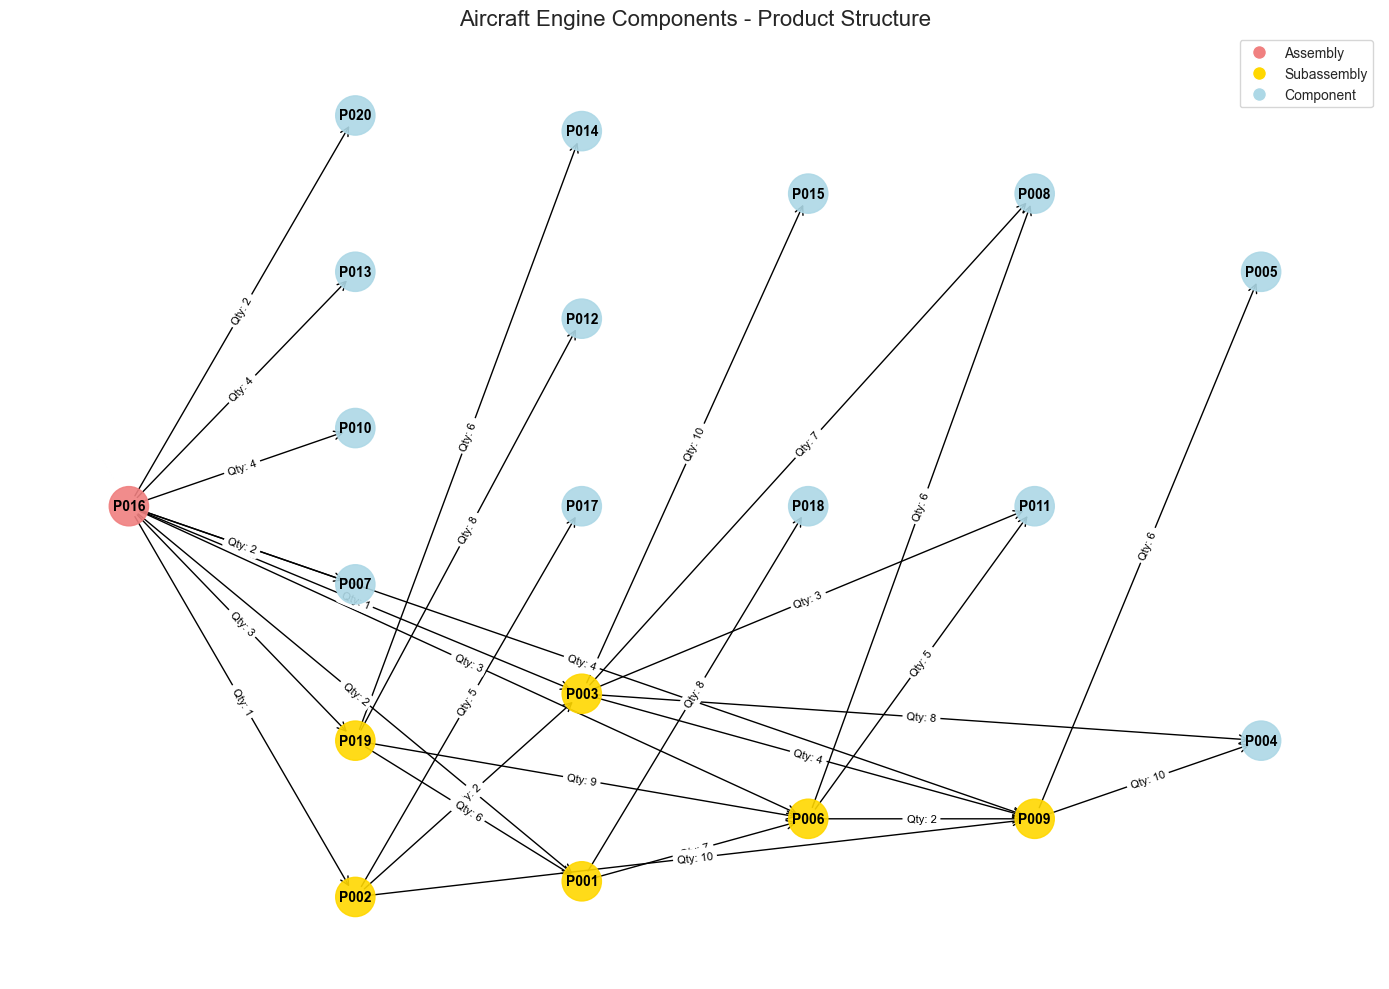

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [6]:
visualize_graph(G, title="Aircraft Engine Components - Product Structure")